#### Note to self:

Don't use np.linalg.norm(psi_final - psi_correct), use (np.dot(psi_correct, psi_final))**2
Because there might be a global phase in psi_final that causes the magnitude of the difference to be large, even though the inner product may be large.

In [1038]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [1039]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=3)

In [1040]:
Values = [1000, 1]
Weights = [2, 3]
Ancil = [1, 2]

alpha = 1e4
beta = 7.1
gamma = max(Values) + 1
T = 1
t_axis = np.arange(0, T, 0.01)

In [1041]:
sigmaI = np.array(
    [
        [1, 0],
        [0, 1],
    ]
)
sigmaX = np.array(
    [
        [0, 1],
        [1, 0],
    ]
)
sigmaBin = np.array(
    [
        [0, 0],
        [0, 1],
    ]
)

In [1042]:
# H0 = np.zeros((2**(len(Values) + len(Ancil)), 2**(len(Values) + len(Ancil))))
H0 = np.kron(np.kron(np.kron(sigmaX, sigmaI), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaX), sigmaI), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaX), sigmaI) + np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaX)
# print(H0)

eigenvals_H0, eigenvecs_H0 = np.linalg.eigh(H0)
ground_idx_H0 = eigenvals_H0.argsort()[0]
print(eigenvals_H0[ground_idx_H0])
print(eigenvecs_H0[:, ground_idx_H0])

-4.000000000000003
[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]


In [1043]:
Hp = (
    - (Values[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Values[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
    + gamma * (
        (Weights[0] * np.kron(np.kron(np.kron(sigmaBin, sigmaI), sigmaI), sigmaI) + Weights[1] * np.kron(np.kron(np.kron(sigmaI, sigmaBin), sigmaI), sigmaI))
      - (Ancil[0] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaBin), sigmaI) + Ancil[1] * np.kron(np.kron(np.kron(sigmaI, sigmaI), sigmaI), sigmaBin))
    )**2
)
# print(Hp)

eigenvals_Hp, eigenvecs_Hp = np.linalg.eigh(Hp)
ground_idx_Hp = eigenvals_Hp.argsort()[0]
print(eigenvals_Hp[ground_idx_Hp])
print(eigenvecs_Hp[:, ground_idx_Hp])


-1000.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [1044]:
def H(t):
    return alpha * ( (1 - t/T)*beta*H0 + (t/T)*Hp )

# print(H(0))
# print(H(T))

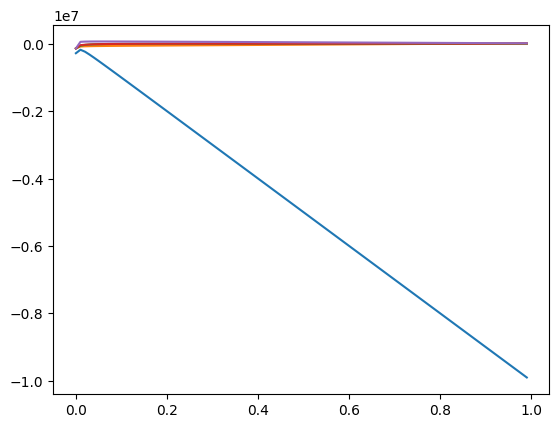

In [1045]:
instant_eigenvals = []
for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)

In [1046]:
int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)

In [1047]:
U = expm(-1j * int_H_T)
# print(U.conjugate().transpose() @ U)

In [1048]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
print(psi_ini)
print(np.linalg.norm(psi_ini))

[ 0.25 -0.25 -0.25  0.25 -0.25  0.25  0.25 -0.25 -0.25  0.25  0.25 -0.25
  0.25 -0.25 -0.25  0.25]
1.0000000000000004


In [1049]:
psi_final = U @ psi_ini
print(psi_final)
print(np.linalg.norm(psi_final))

[ 0.105-0.222j  0.126+0.214j  0.074+0.236j -0.136-0.209j  0.233+0.087j
 -0.075+0.236j  0.21 +0.134j  0.143+0.209j -0.227+0.101j -0.047+0.247j
 -0.021+0.256j  0.023-0.255j -0.08 -0.236j  0.193-0.159j  0.235-0.084j
  0.123+0.217j]
1.0000000004172211


In [1050]:
psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
print(psi_correct)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [1051]:
def int_H(t):
    return 0.5 * alpha * t / T * (2 * beta * H0*T + (-beta * H0 + Hp)*t )

def Unitary(t):
    return expm(-1j * int_H(t))

In [1052]:
int_H(T) - int_H_T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [1053]:
int_H(T)

array([[ 0.000e+00,  3.550e+04,  3.550e+04,  0.000e+00,  3.550e+04,
         0.000e+00,  0.000e+00,  0.000e+00,  3.550e+04,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 3.550e+04,  2.002e+07,  0.000e+00,  3.550e+04,  0.000e+00,
         3.550e+04,  0.000e+00,  0.000e+00,  0.000e+00,  3.550e+04,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 3.550e+04,  0.000e+00,  5.005e+06,  3.550e+04,  0.000e+00,
         0.000e+00,  3.550e+04,  0.000e+00,  0.000e+00,  0.000e+00,
         3.550e+04,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  3.550e+04,  3.550e+04,  4.504e+07,  0.000e+00,
         0.000e+00,  0.000e+00,  3.550e+04,  0.000e+00,  0.000e+00,
         0.000e+00,  3.550e+04,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 3.550e+04,  0.000e+00,  0.000e+00,  0.000e+00,  4.504e+07,
         3.550e+04,  3.550e+04, 

In [1054]:
H(T)

array([[ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  4.004e+07,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  1.001e+07,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  9.009e+07,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00],
       [ 0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  9.008e+07,
         0.000e+00,  0.000e+00, 

In [1055]:
Unitary(T)

array([[ 0.418-0.908j, -0.002+0.j   , -0.005-0.j   ,  0.   +0.j   ,
        -0.001+0.j   ,  0.   -0.j   ,  0.   +0.j   ,  0.   -0.j   ,
         0.001+0.001j,  0.   -0.j   , -0.003+0.003j,  0.002-0.018j,
        -0.   -0.j   , -0.   +0.j   ,  0.   -0.j   , -0.   +0.j   ],
       [-0.002+0.j   , -0.508-0.862j,  0.   -0.j   , -0.   +0.j   ,
         0.   +0.j   , -0.   -0.004j,  0.   +0.j   , -0.   -0.j   ,
        -0.   -0.j   , -0.   -0.003j,  0.   -0.j   , -0.   +0.j   ,
         0.   -0.j   ,  0.   +0.j   , -0.   -0.j   ,  0.   +0.j   ],
       [-0.005-0.j   ,  0.   -0.j   , -0.301-0.953j, -0.   +0.j   ,
        -0.   -0.j   , -0.   +0.001j,  0.003+0.004j,  0.   +0.j   ,
         0.   +0.j   , -0.   +0.j   , -0.004-0.013j, -0.002+0.001j,
        -0.   -0.j   ,  0.   -0.j   , -0.   +0.j   ,  0.   -0.j   ],
       [ 0.   +0.j   , -0.   +0.j   , -0.   +0.j   , -0.544-0.839j,
         0.   -0.j   , -0.   -0.j   , -0.   -0.j   ,  0.   -0.j   ,
         0.   -0.j   , -0.   +0.j   , -0.   +

In [1056]:
Unitary(T).conjugate().transpose() @ Unitary(T)

array([[ 1.+0.j, -0.-0.j, -0.-0.j,  0.+0.j, -0.+0.j,  0.-0.j,  0.-0.j,
         0.-0.j, -0.-0.j,  0.-0.j, -0.+0.j,  0.-0.j,  0.-0.j, -0.+0.j,
         0.-0.j, -0.+0.j],
       [-0.+0.j,  1.+0.j,  0.-0.j,  0.-0.j, -0.-0.j, -0.-0.j,  0.-0.j,
         0.-0.j,  0.-0.j,  0.+0.j,  0.-0.j, -0.+0.j,  0.+0.j, -0.+0.j,
        -0.+0.j,  0.-0.j],
       [-0.+0.j,  0.+0.j,  1.+0.j,  0.-0.j,  0.+0.j,  0.-0.j,  0.+0.j,
         0.-0.j,  0.+0.j,  0.+0.j, -0.-0.j, -0.+0.j, -0.-0.j, -0.+0.j,
         0.+0.j,  0.-0.j],
       [ 0.-0.j,  0.+0.j,  0.+0.j,  1.-0.j,  0.-0.j,  0.-0.j, -0.-0.j,
         0.-0.j, -0.+0.j, -0.+0.j,  0.-0.j,  0.+0.j, -0.+0.j,  0.+0.j,
        -0.+0.j,  0.-0.j],
       [-0.-0.j, -0.+0.j,  0.-0.j,  0.+0.j,  1.+0.j, -0.+0.j, -0.-0.j,
         0.-0.j,  0.-0.j, -0.+0.j,  0.-0.j, -0.+0.j,  0.-0.j,  0.-0.j,
         0.+0.j,  0.-0.j],
       [ 0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j, -0.-0.j,  1.-0.j,  0.-0.j,
        -0.+0.j, -0.-0.j, -0.+0.j, -0.+0.j,  0.+0.j,  0.-0.j, -0.-0.j,
         0.-0

In [1057]:
psi_ini = eigenvecs_H0[:, ground_idx_H0]
# print(psi_ini)
# print(np.linalg.norm(psi_ini))

psi_correct = eigenvecs_Hp[:, ground_idx_Hp]
# print(psi_correct)

# psi_t_list = []
energy_expectation_t_list = []
psi_t_list = []

for t in t_axis:
    psi_t = Unitary(t) @ psi_ini
    # print(psi_t)
    # print(np.linalg.norm(psi_t))
    energy_expectation_t_list.append(psi_t.conjugate().transpose() @ H(t) @ psi_t)
    psi_t_list.append(psi_t)

print(energy_expectation_t_list)
for psi_t in psi_t_list:
    print(psi_t, sep="\n")

[np.complex128(-284000.00000000023+0j), np.complex128(93185.60243925783-7.275957614183426e-12j), np.complex128(616211.3158289231-1.0913936421275139e-11j), np.complex128(914210.1522052698-1.0913936421275139e-11j), np.complex128(1567530.5235730442-1.4551915228366852e-11j), np.complex128(1948569.0306371832-7.275957614183426e-11j), np.complex128(2485281.719870838-1.4551915228366852e-11j), np.complex128(2981355.8693288765-7.275957614183426e-11j), np.complex128(3477962.1570785427+8.731149137020111e-11j), np.complex128(4006083.939157906+1.4551915228366852e-10j), np.complex128(4452772.348305562+7.275957614183426e-12j), np.complex128(4928092.572558433+2.9103830456733704e-11j), np.complex128(5525062.706419351+5.820766091346741e-11j), np.complex128(5980803.881760877+0j), np.complex128(6521935.097719301-2.9103830456733704e-10j), np.complex128(7020154.169101396-8.731149137020111e-11j), np.complex128(7497629.46374778+2.0372681319713593e-10j), np.complex128(8011884.145992679+4.0745362639427185e-10j),

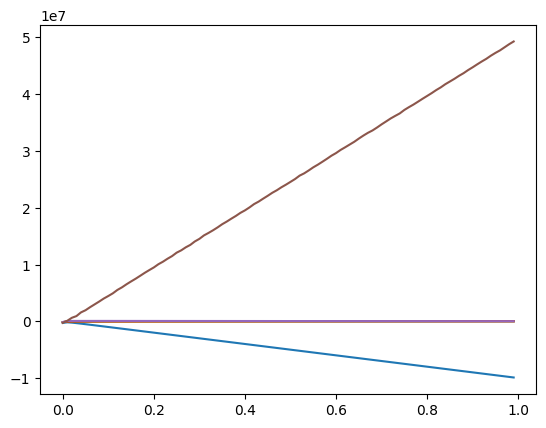

In [1058]:
instant_eigenvals = []

for t in t_axis:
    eigenvals, eigenvecs = np.linalg.eigh(H(t))
    instant_eigenvals.append(eigenvals[eigenvals.argsort()[0:5]])

# print(instant_eigenvals)
plt.plot(t_axis, instant_eigenvals)
plt.plot(t_axis, energy_expectation_t_list)

In [1059]:
accuracy_list = []
beta_list = np.arange(0, 15000, 1)

for beta in beta_list:
    int_H_T = 0.5 * alpha * T * (beta*H0 + Hp)
    U = expm(-1j * int_H_T)

    psi_final = U @ psi_ini
    # print(psi_final)
    # print(psi_final.conjugate().transpose() @ psi_final)
    accuracy = np.abs(np.dot(psi_correct, psi_final))**2
    # print(accuracy)
    accuracy_list.append(accuracy)
    
accuracy_list = np.array(accuracy_list)

Text(0, 0.5, 'accuracy')

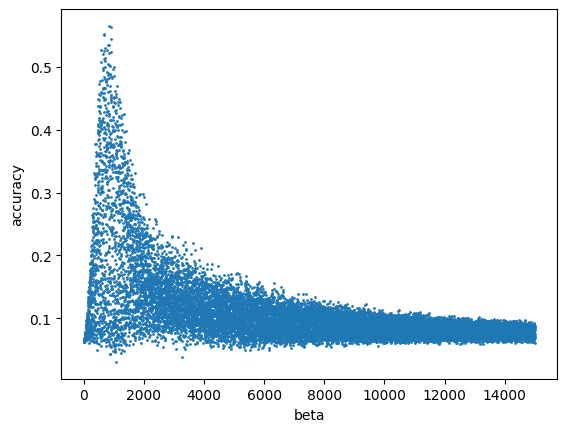

In [1060]:
plt.scatter(beta_list, accuracy_list, s=1)
plt.xlabel("beta")
plt.ylabel("accuracy")

In [1061]:
max(accuracy_list)

np.float64(0.5654802931598533)

In [1062]:
beta_list[accuracy_list.argmax()]

np.int64(836)